# Newton Method for Finding Maximum or Minimum
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2023-11-10

### Taylor expansion

Reference: [http://mathworld.wolfram.com/TaylorSeries.html](http://mathworld.wolfram.com/TaylorSeries.html) 

A Taylor series is a series expansion of a function about a point. A one-dimensional Taylor series is an expansion of a real function about a point x

$$f\left(x\right)=f\left(a\right)+f^{\prime } \left(a\right)\left(x-a\right)+\frac{1}{2}{f^{\prime } }^{\prime } \left(a\right){\left(x-a\right)}^2 +\cdots$$


### Newton method

Reference: [https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization)


Newton's method attempts to find the roots of $f^{\prime }$ by constructing a sequence $x_n$ from an initial guess $x_0$ that converges towards some value $x^*$ satifying $f^{\prime } (x^* )=0$ . This $x^*$is a stationary point (differentiable) of $f$. The second-order taylor exapnasion $f_T (x)$ of a function $f$ around $x_n$ is

$$f_T (x)=f_T (x_n +\Delta x)\approx f(x_n )+f^{\prime } (x_n )\Delta x+\frac{1}{2}f^{\prime \prime } (x_n )\Delta x^2$$


Ideally, we watn to pick a $\Delta x$ such that $x_n +\Delta x$ is a stationary point of $f$. Using this Taylor expansion as an approximation, we can at least solve for the $\Delta x$ corresponding to the root of the expansion's derivative:


$$0=\frac{{\mathrm{d}}}{{\mathrm{d}\Delta \mathrm{x}}}\left(f(x_n )+f^{\prime } (x_n )\Delta x+\frac{1}{2}f^{\prime \prime } (x_n )\Delta x^2 \right)=f^{\prime } (x_n )+f^{\prime \prime } (x_n )\Delta x$$

$$\Delta x=-\frac{f^{\prime } (x_n )}{f^{\prime \prime } (x_n )}$$


-1.20000000000000
2.50000000000000


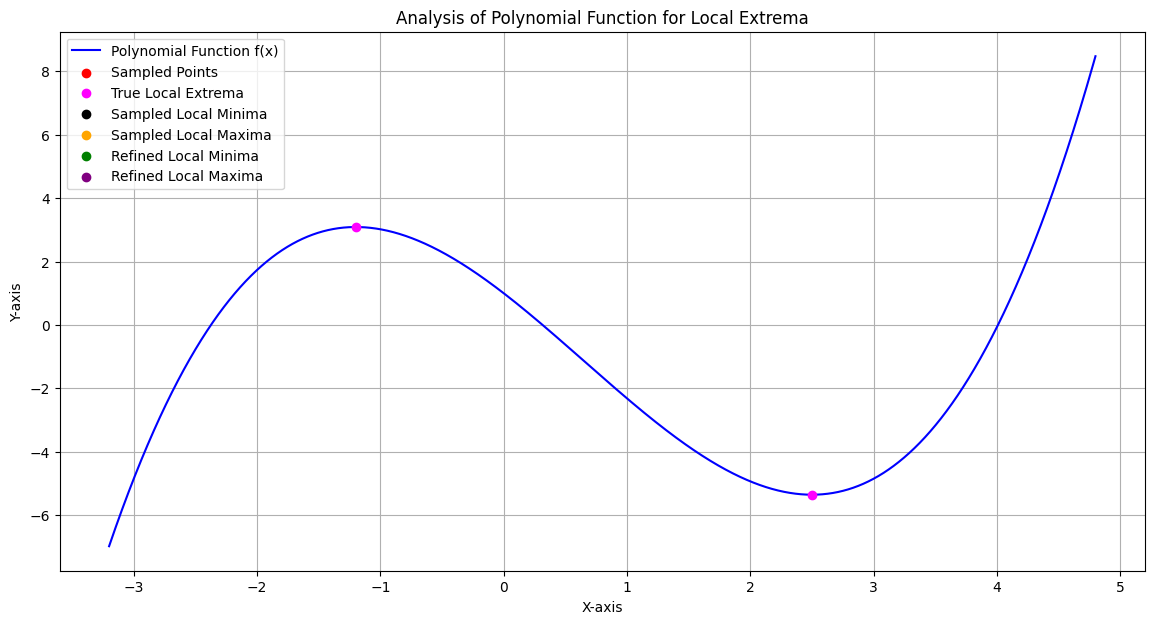

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import symbols, diff, solve, Eq

# Define the symbol
a = symbols('a')

# Define the equation
eq = Eq(1/3*a**3 - 0.65*a**2 - 3*a + 1, 0)

# Take the derivative of the equation
derivative = diff(eq.lhs, a)

# Solve the derivative equation for local maxima and minima
local_extrema = solve(derivative, a)

# Evaluate the solutions to a numerical approximation
t_loc_max_min_x = [sol.evalf() for sol in local_extrema]

# Print the results
for extrema in t_loc_max_min_x:
    print(extrema)

# Polynomial coefficients and range of x
p = [1/3, -0.65, -3, 1]
x = np.arange(-3.2, 4.8, 0.001)

# Calculate the polynomial and its first and second derivatives
y = np.polyval(p, x)
yp = np.gradient(y, 0.001)  # First derivative
ypp = np.gradient(yp, 0.001)  # Second derivative

# Sampled data points
sample_points = np.arange(-3, 5, 1)
idx_sample = np.in1d(x, sample_points)
data_x = x[idx_sample]
data_y = y[idx_sample]

# True local maxima and minima
t_loc_max_min_x = np.array([-1.2, 2.5])
t_loc_max_min_y = np.polyval(p, t_loc_max_min_x)

# Find local minima and maxima from the sampled data
local_minima_indices = (np.diff(np.sign(np.diff(data_y))) > 0).nonzero()[0] + 1
local_maxima_indices = (np.diff(np.sign(np.diff(data_y))) < 0).nonzero()[0] + 1

local_min_x = data_x[local_minima_indices]
local_min_y = data_y[local_minima_indices]
local_max_x = data_x[local_maxima_indices]
local_max_y = data_y[local_maxima_indices]

# Refine the location of local minima and maxima using Newton's method
def refine_extrema(x_vals, y_vals, y_prime, y_double_prime):
    return x_vals - y_prime / y_double_prime

# Interpolation to get the values of the first and second derivatives at the extrema points
interp_min_yp = np.interp(local_min_x, x[:-1], yp[:-1])
interp_min_ypp = np.interp(local_min_x, x[:-2], ypp[:-2])
interp_max_yp = np.interp(local_max_x, x[:-1], yp[:-1])
interp_max_ypp = np.interp(local_max_x, x[:-2], ypp[:-2])

# Applying the refinement
local_min_x_refined = refine_extrema(local_min_x, local_min_y, interp_min_yp, interp_min_ypp)
local_max_x_refined = refine_extrema(local_max_x, local_max_y, interp_max_yp, interp_max_ypp)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plotting the polynomial function
plt.plot(x, y, label='Polynomial Function f(x)', color='blue')

# Highlighting the sampled points
plt.scatter(data_x, data_y, color='red', label='Sampled Points')

# Highlighting the true local minima and maxima
plt.scatter(t_loc_max_min_x, t_loc_max_min_y, color='magenta', label='True Local Extrema', zorder=5)

# Highlighting the local minima and maxima from the sampled data
plt.scatter(local_min_x, local_min_y, color='black', label='Sampled Local Minima', zorder=5)
plt.scatter(local_max_x, local_max_y, color='orange', label='Sampled Local Maxima', zorder=5)

# Highlighting the refined local minima and maxima
plt.scatter(local_min_x_refined, np.polyval(p, local_min_x_refined), color='green', label='Refined Local Minima', zorder=5)
plt.scatter(local_max_x_refined, np.polyval(p, local_max_x_refined), color='purple', label='Refined Local Maxima', zorder=5)

# Adding vertical lines for the refined extrema
for x_coord in local_min_x_refined:
    plt.axvline(x=x_coord, color='green', linestyle='--', linewidth=0.5)
for x_coord in local_max_x_refined:
    plt.axvline(x=x_coord, color='purple', linestyle='--', linewidth=0.5)

# Labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Analysis of Polynomial Function for Local Extrema')
plt.legend()
plt.grid(True)
plt.show()